In [1]:
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import os.path
import io
import PIL

In [2]:
parent = os.path.dirname(os.getcwd())
path = parent + '\\data\\'

In [4]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")  #"%d-%m-%Y"
df=pd.read_csv(path+"stay-at-home-covid.csv", parse_dates=['Day'],date_parser=custom_date_parser) 

In [5]:
df=df[df["Day"]>="20-01-2020"]
df['date'] = df['Day'].dt.date.apply(lambda x: str(x))

C:\Users\jesic\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:60: UserWarning: Parsing '20-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)


In [6]:
df.loc[(df["Entity"]=="Germany") & (df["Day"]>="2021-11-10"),"stay_home_requirements"]=0

In [7]:
df_filt_map=df[(df.Day.dt.day==23) | (df.Day.dt.day==8) ]
df_filt_map=df_filt_map[df_filt_map["Day"]<"09-09-2022"]


In [8]:
df_filt_map=df_filt_map.rename(columns={"stay_home_requirements":"stay home requirements"})

In [9]:
fig=px.choropleth(df_filt_map, 
              locations = 'Code',
              color="stay home requirements", 
              animation_frame="date",
              color_continuous_scale="ylgnBu",
              title='Covid stay at home policies',
              height=600,
                  width=1000
             )
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 45
fig.update_geos(projection_type="equirectangular", visible=True, resolution=110)
fig.show()

frames = []
for s, fr in enumerate(fig.frames):
    fig.update(data=fr.data)
    fig.layout.sliders[0].update(active=s)
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))
    
# create animated GIF
frames[0].save(
        "test.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=500,
        loop=0,
    )

In [10]:
df_merged=pd.read_csv(path+"df_merged.csv", parse_dates=['date']).drop(columns="Unnamed: 0")

In [37]:
df_merged.head()

country_region_code        country_region                     place_id  \
0                  AE  United Arab Emirates  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
1                  AE  United Arab Emirates  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
2                  AE  United Arab Emirates  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
3                  AE  United Arab Emirates  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
4                  AE  United Arab Emirates  ChIJvRKrsd9IXj4RpwoIwFYv0zM   

        date  retail_and_recreation  grocery_and_pharmacy  parks  \
0 2020-02-15                    0.0                   4.0    5.0   
1 2020-02-16                    1.0                   4.0    4.0   
2 2020-02-17                   -1.0                   1.0    5.0   
3 2020-02-18                   -2.0                   1.0    5.0   
4 2020-02-19                   -2.0                   0.0    4.0   

   transit_stations  workplaces  residential  ... people_vaccinated  \
0               0.0         2.0          1.0  ...               NaN   
1               1.0         2.0          1.0  ...               NaN   
2               1.0         2.0          1.0  ...               NaN   
3               0.0         2.0          1.0  ...               NaN   
4              -1.0         2.0          1.0  ...               NaN   

  people_fully_vaccinated  total_boosters  new_vaccinations  \
0                     NaN             NaN               NaN   
1                     NaN             NaN               NaN   
2                     NaN             NaN               NaN   
3                     NaN             NaN               NaN   
4                     NaN             NaN               NaN   

   new_vaccinations_smoothed  new_vaccinations_smoothed_per_million  \
0                        NaN                                    NaN   
1                        NaN                                    NaN   
2                        NaN                                    NaN   
3                        NaN                                    NaN   
4                        NaN                                    NaN   

   new_people_vaccinated_smoothed  stringency_index  day_of_week  is_weekend  
0                             NaN              2.78            5     Weekend  
1                             NaN              2.78            6     Weekend  
2                             NaN              2.78            0     Weekday  
3                             NaN              2.78            1     Weekday  
4                             NaN              2.78            2     Weekday  

[5 rows x 35 columns]

In [12]:
df_merged_pol=pd.merge(df_merged,df.drop(columns="date"), how="outer", left_on=["date","country_region"], right_on=["Day","Entity"])


In [13]:
df_merged_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248448 entries, 0 to 248447
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   country_region_code                    184289 non-null  object        
 1   country_region                         185235 non-null  object        
 2   place_id                               185235 non-null  object        
 3   date                                   185235 non-null  datetime64[ns]
 4   retail_and_recreation                  183009 non-null  float64       
 5   grocery_and_pharmacy                   183029 non-null  float64       
 6   parks                                  182129 non-null  float64       
 7   transit_stations                       183694 non-null  float64       
 8   workplaces                             184634 non-null  float64       
 9   residential                            183283 no

In [14]:
areas=['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
countries=['Germany', 'Italy', 'New Zealand', 'United States']


In [15]:
df_filt=df_merged_pol[df_merged_pol["country_region"].isin(countries)]

In [16]:
df_filt_graph=df_filt[["country_region","date",'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential','stay_home_requirements']]
df_filt_graph=df_filt_graph.melt(id_vars=["country_region", "date","stay_home_requirements"], 
        var_name="Item", 
        value_name="Value")

In [17]:
df_filt_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23298 entries, 0 to 23297
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country_region          23298 non-null  object        
 1   date                    23298 non-null  datetime64[ns]
 2   stay_home_requirements  23094 non-null  float64       
 3   Item                    23298 non-null  object        
 4   Value                   23298 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 910.2+ KB


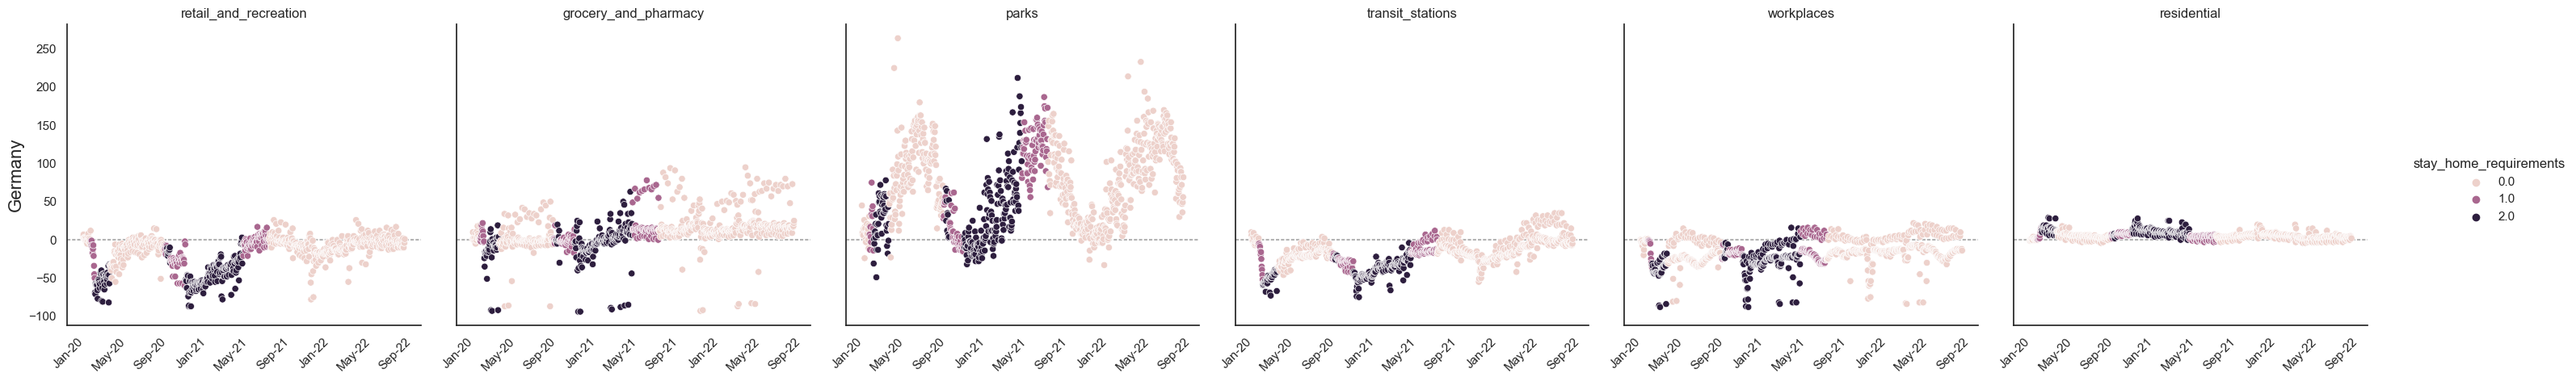

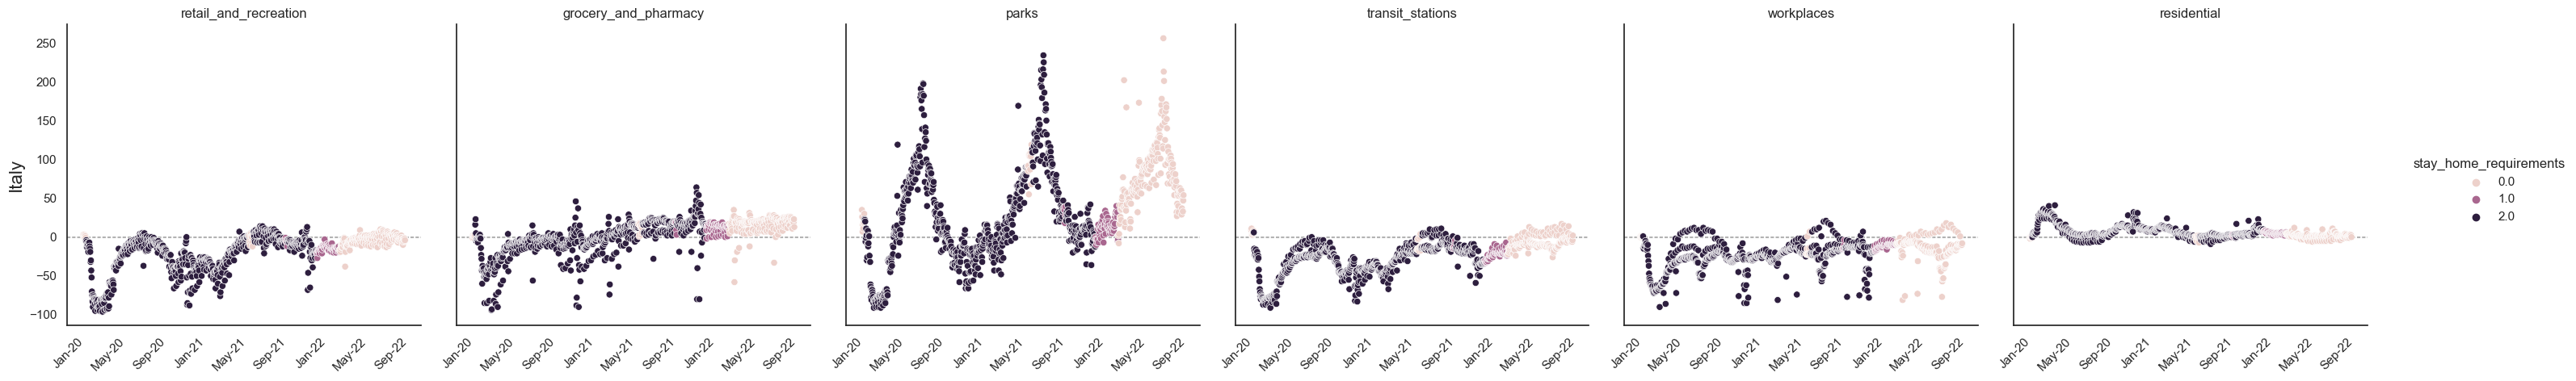

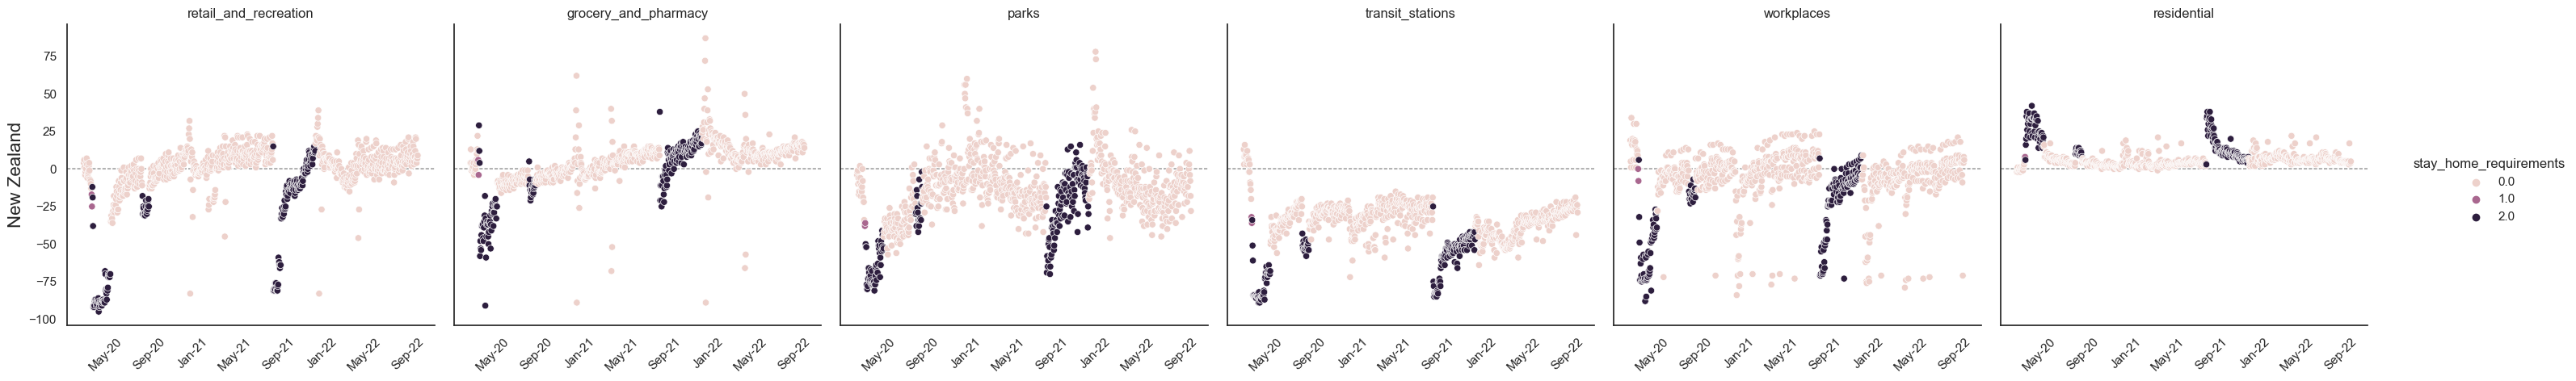

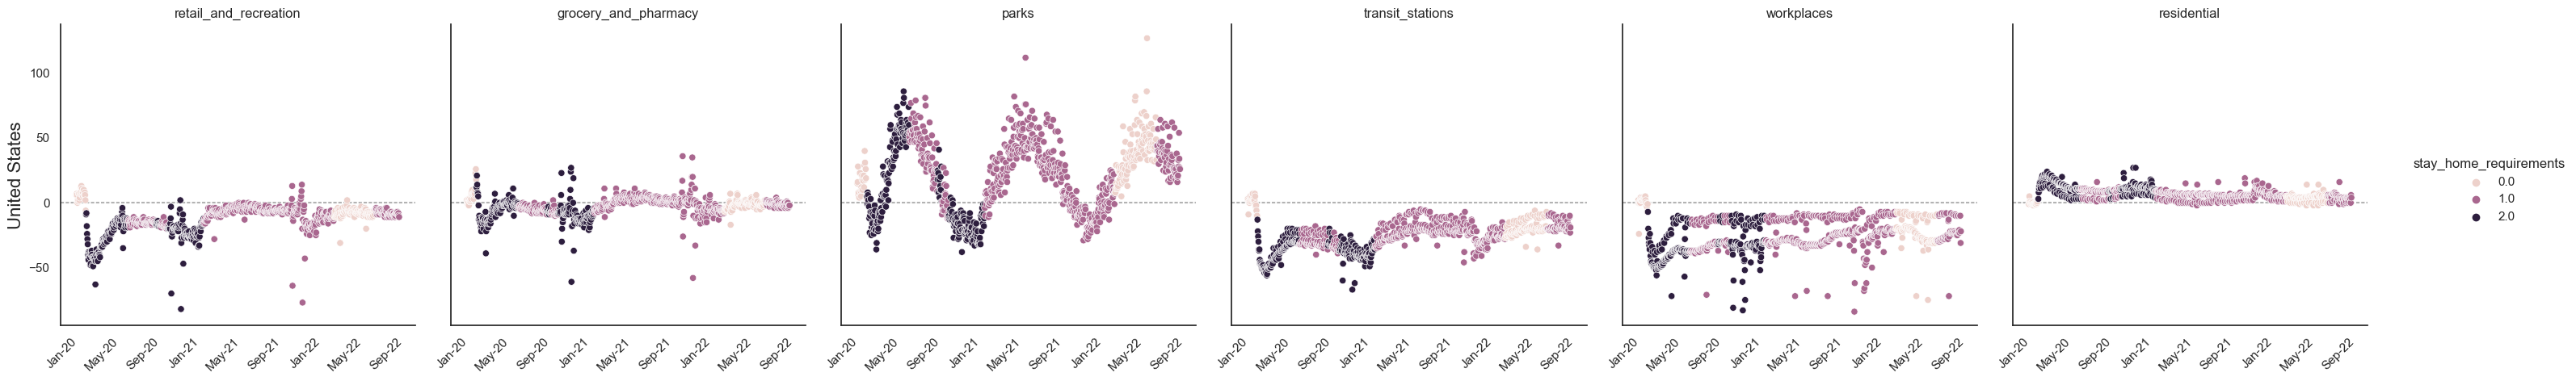

In [18]:
sns.set_theme(style="white")
plt.rcParams.update({'font.size': 16})

for country in df_filt["country_region"].unique():

    g = sns.relplot(
        data=df_filt_graph[df_filt_graph["country_region"]==country], x="date", y="Value", hue="stay_home_requirements", col="Item"
       , kind="scatter",
    ) 
    g.set_axis_labels("", country,  fontsize=16)
    g.set_titles("{col_name}", fontsize=30)
    g.axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    g.set_xticklabels( rotation=45)
    g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
    plt.show()

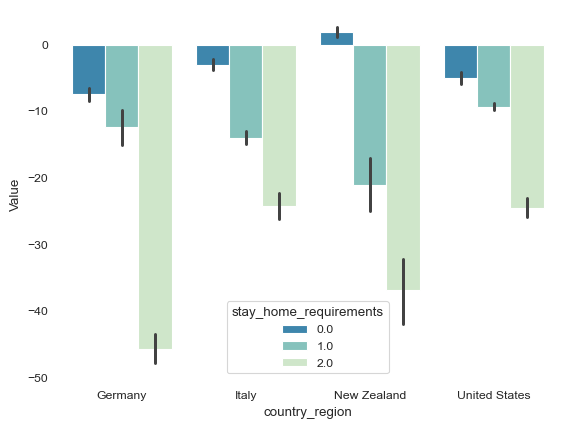

In [19]:
sns.set_context("paper", )

sns.barplot(data=df_filt_graph[df_filt_graph["Item"]=="retail_and_recreation"], x="country_region", hue= "stay_home_requirements" ,y="Value", palette="GnBu_r")
sns.despine(bottom = True, left = True, right=True, top=True)


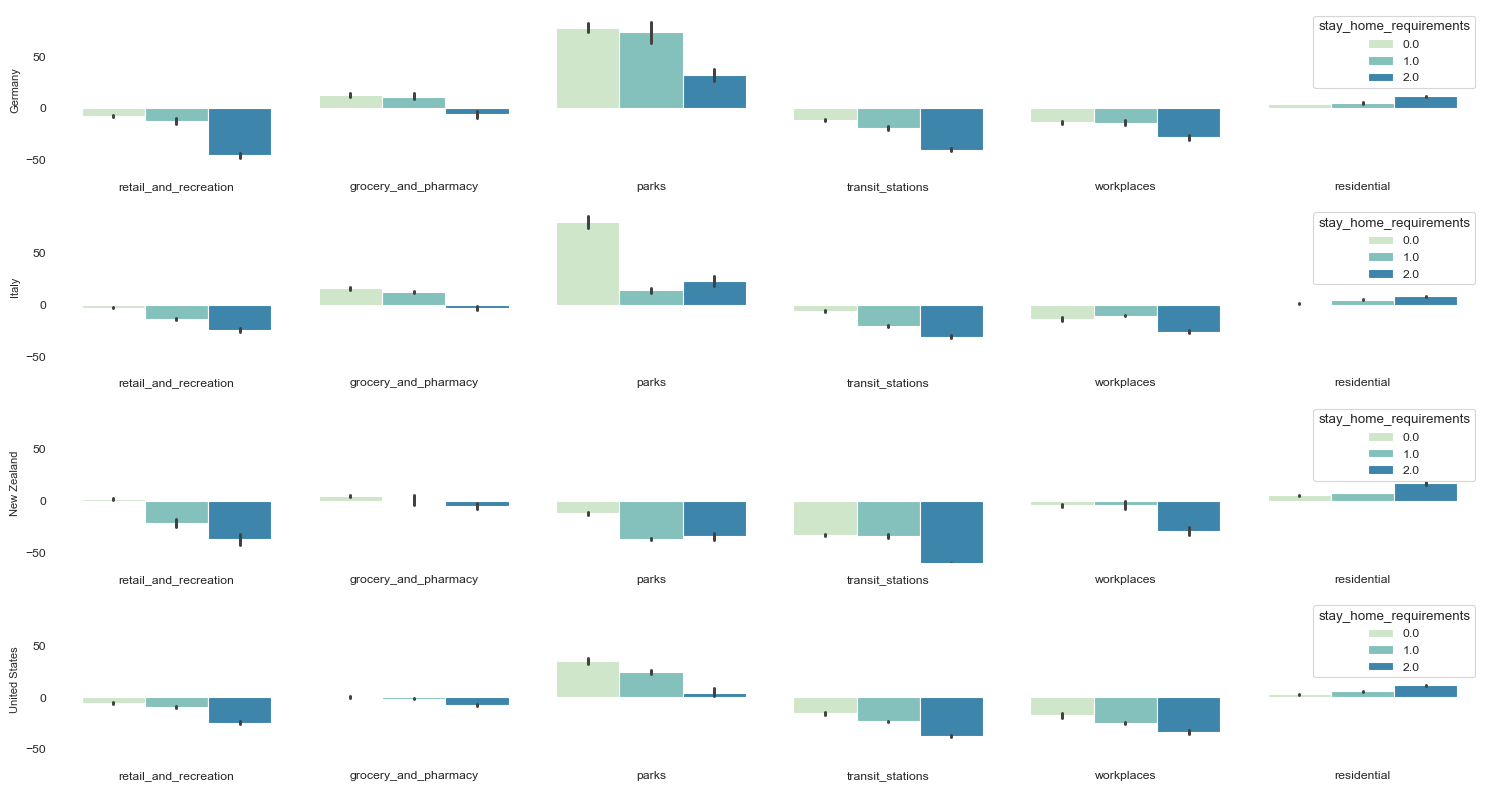

In [20]:
sns.set_context("paper", )

plt.figure(figsize=(15,8))
for n, i in  enumerate(df_filt.iloc[:,0:4]):
    plt.subplot(4,1,n+1)
    sns.barplot(data=df_filt_graph[df_filt_graph["country_region"]==countries[n]], x="Item",
                     hue= "stay_home_requirements" ,y="Value", palette="GnBu",)
    sns.despine(bottom = True, left = True, right=True, top=True)
    plt.ylabel(countries[n], fontsize=8)
    plt.xlabel("", fontsize=8)
    plt.ylim([-60,95])
plt.tight_layout()



In [22]:
df_merged_pol_aux=df_merged_pol[df_merged_pol['stay_home_requirements'].notna()]

In [23]:
df_merged_pol_aux['background'] = df_merged_pol_aux.loc[:,'stay_home_requirements'].astype(int).astype(str).map(lambda x: 'C'+x)

C:\Users\jesic\AppData\Local\Temp\ipykernel_33224\955016447.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#filter df for one specific country, in this case Germany
country="Germany"
df_country=df_merged_pol_aux[df_merged_pol_aux["country_region"]==country]
df_country

country_region_code country_region                     place_id  \
28591                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
28592                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
28593                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
28594                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
28595                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
...                   ...            ...                          ...   
29545                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
29546                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
29547                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
29548                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   
29549                  DE        Germany  ChIJa76xwh5ymkcRW-WRjmtd6HU   

            date  retail_and_recreation  grocery_and_pharmacy  parks  \
28591 2020-02-15                    6.0                   1.0   45.0   
28592 2020-02-16                    7.0                  10.0    9.0   
28593 2020-02-17                    2.0                   2.0    7.0   
28594 2020-02-18                    2.0                   2.0   10.0   
28595 2020-02-19                    3.0                   0.0    6.0   
...          ...                    ...                   ...    ...   
29545 2022-09-26                   -9.0                  17.0   47.0   
29546 2022-09-27                  -10.0                  17.0   36.0   
29547 2022-09-28                   -4.0                  18.0   49.0   
29548 2022-09-29                   -4.0                  22.0   56.0   
29549 2022-09-30                    1.0                  25.0   82.0   

       transit_stations  workplaces  residential  ...  \
28591              10.0         0.0         -1.0  ...   
28592               6.0        -1.0          0.0  ...   
28593               1.0        -2.0          0.0  ...   
28594               1.0        -1.0          1.0  ...   
28595              -1.0        -1.0          1.0  ...   
...                 ...         ...          ...  ...   
29545              -6.0       -13.0          4.0  ...   
29546              -7.0       -12.0          5.0  ...   
29547              -6.0       -12.0          4.0  ...   
29548              -5.0       -12.0          3.0  ...   
29549               1.0       -14.0          2.0  ...   

      new_vaccinations_smoothed_per_million new_people_vaccinated_smoothed  \
28591                                   NaN                            NaN   
28592                                   NaN                            NaN   
28593                                   NaN                            NaN   
28594                                   NaN                            NaN   
28595                                   NaN                            NaN   
...                                     ...                            ...   
29545                                 472.0                          610.0   
29546                                 511.0                          634.0   
29547                                 554.0                          677.0   
29548                                 610.0                          696.0   
29549                                 665.0                          729.0   

       stringency_index  day_of_week  is_weekend   Entity  Code        Day  \
28591             11.11          5.0     Weekend  Germany   DEU 2020-02-15   
28592             11.11          6.0     Weekend  Germany   DEU 2020-02-16   
28593             11.11          0.0     Weekday  Germany   DEU 2020-02-17   
28594             11.11          1.0     Weekday  Germany   DEU 2020-02-18   
28595             11.11          2.0     Weekday  Germany   DEU 2020-02-19   
...                 ...          ...         ...      ...   ...        ...   
29545             14.81          0.0     Weekday  Germany   DEU 2022-09-26   
29546             

<Figure size 1500x800 with 0 Axes>

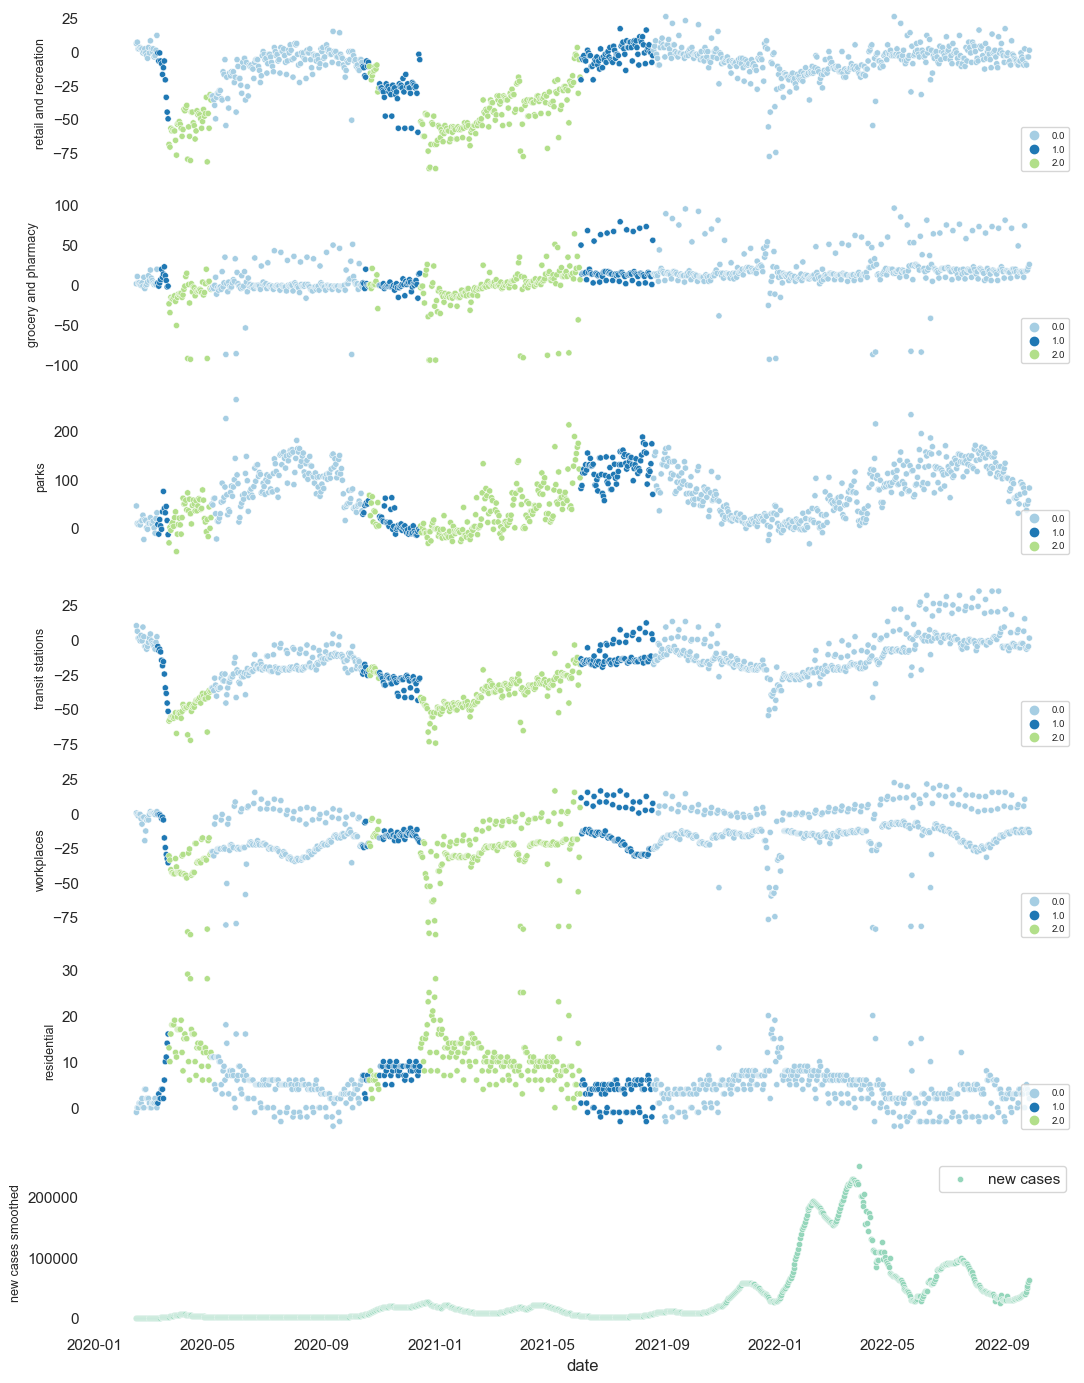

In [25]:
sns.set_context("paper", )
sns.set_theme(style="white")
sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"
fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "stay_home_requirements",ax=i, palette="Paired")
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=9)
        plt.xlabel("", fontsize=8)
        #plt.axis('off'  )
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 7})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=9)
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

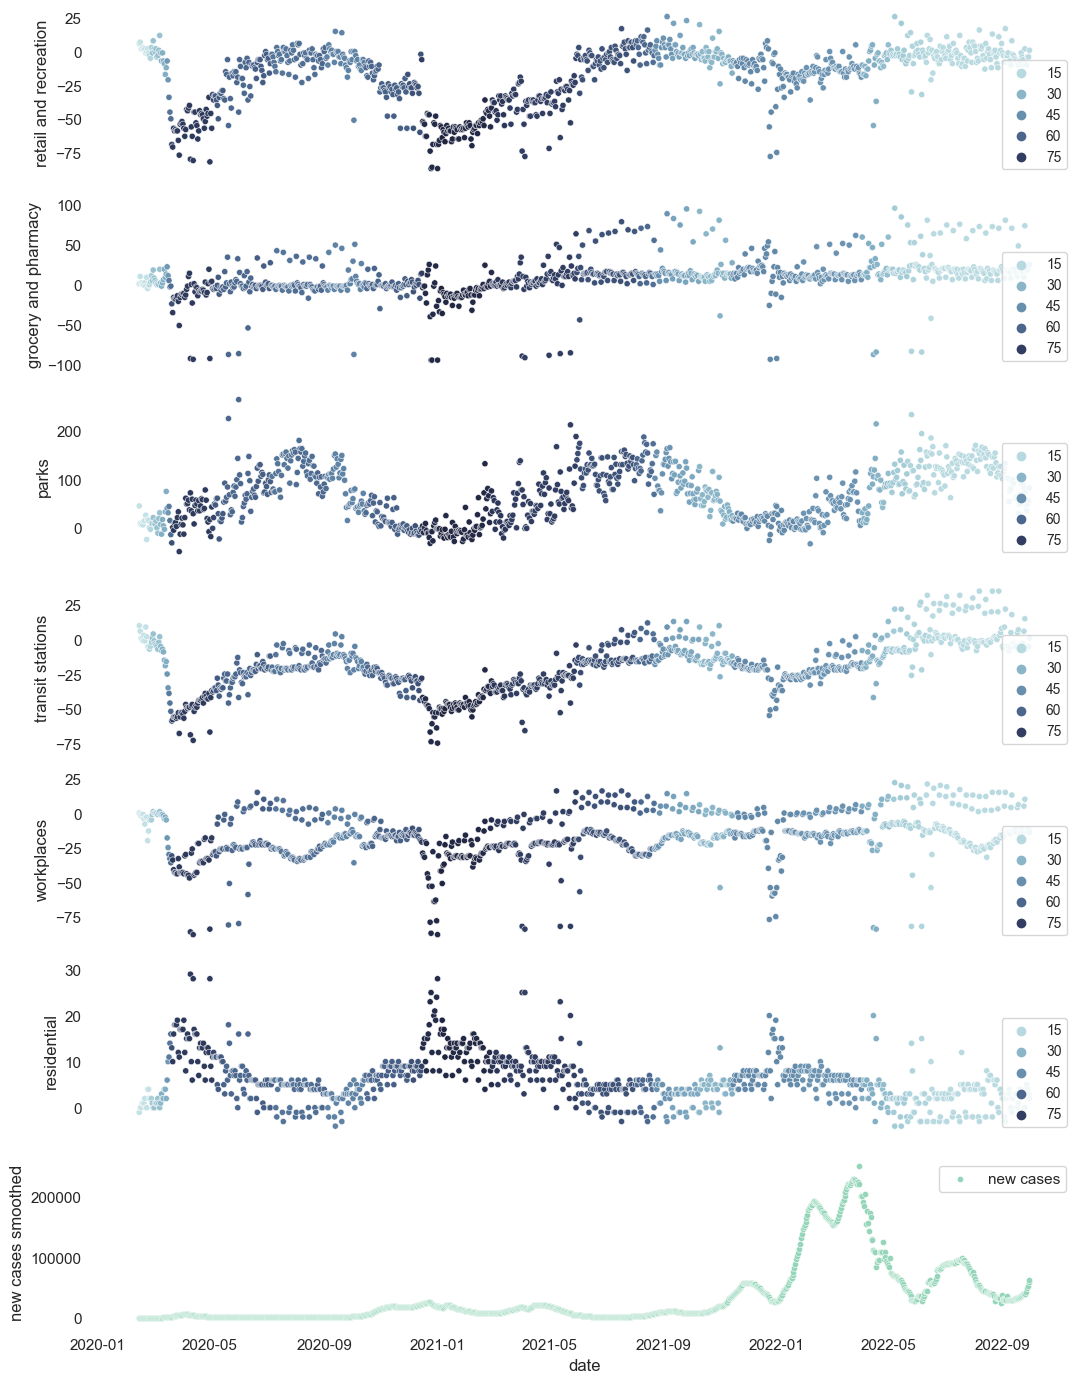

In [26]:
sns.set_context("paper", )
sns.set_theme(style="white")
sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"

fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "stringency_index", palette=cmap,ax=i)
        #sns.scatterplot(data=df_country,x="date",y=areas[0],s=20, hue = "stringency_index", palette=cmap)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=12)
        plt.xlabel("", fontsize=12)
        #plt.axis('off'  )
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 10})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

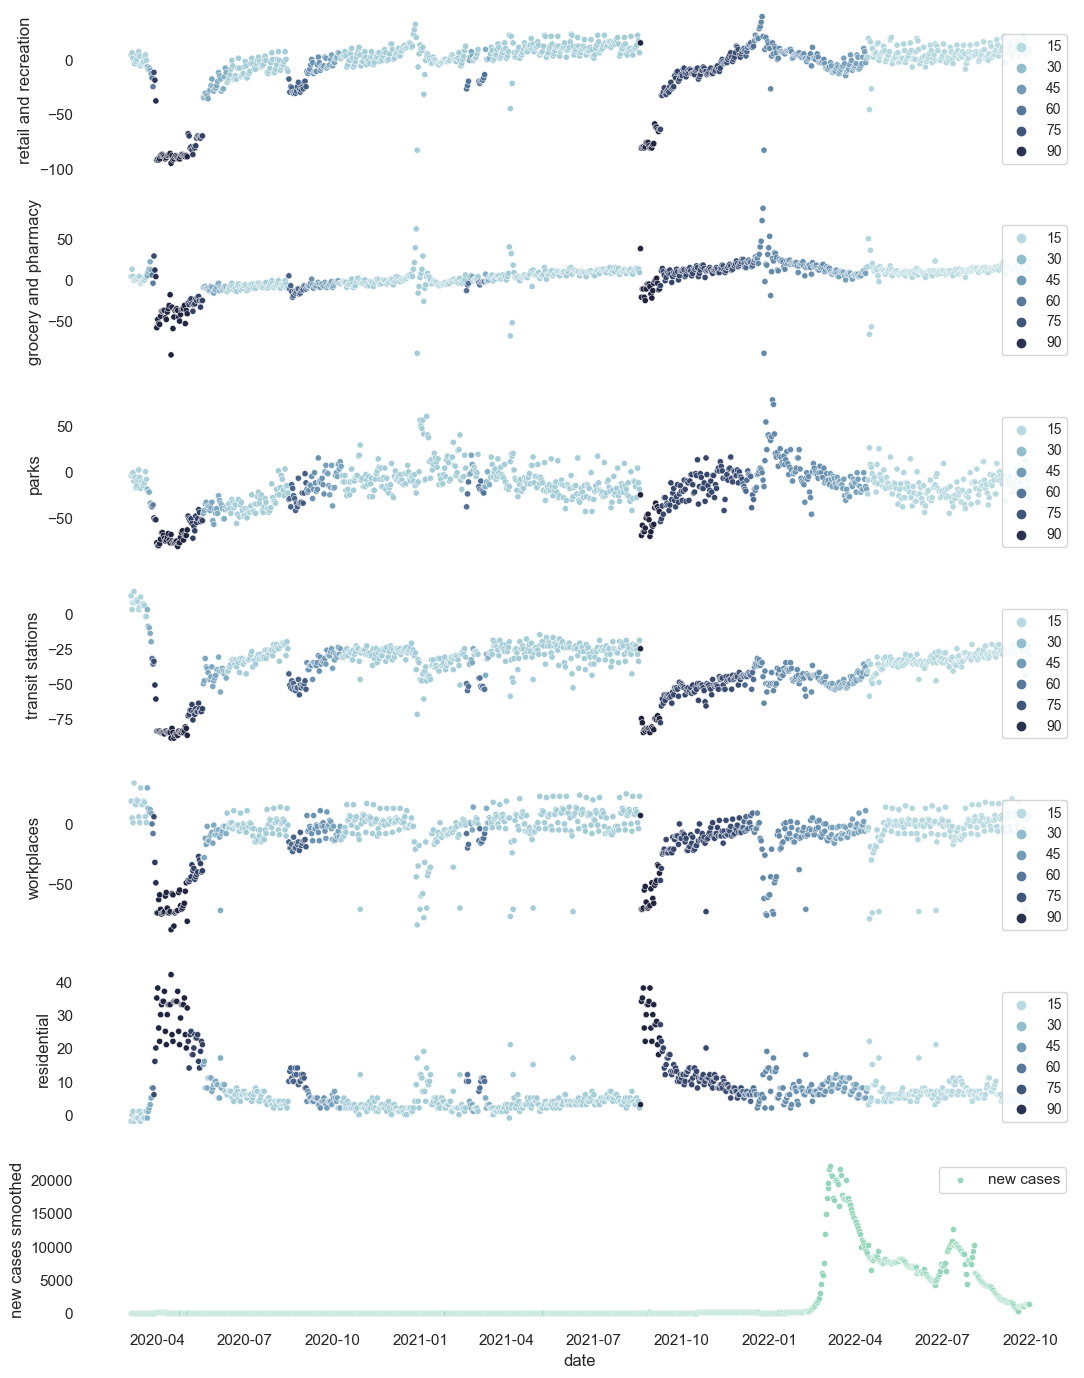

In [27]:
#filter df for one specific country, in this case New Zealand
country="New Zealand"
df_country=df_merged_pol_aux[df_merged_pol_aux["country_region"]==country]


sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"

fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "stringency_index", palette=cmap,ax=i)
        #sns.scatterplot(data=df_country,x="date",y=areas[0],s=20, hue = "stringency_index", palette=cmap)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=12)
        plt.xlabel("", fontsize=12)
        #plt.axis('off'  )
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 10})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=12)


        
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

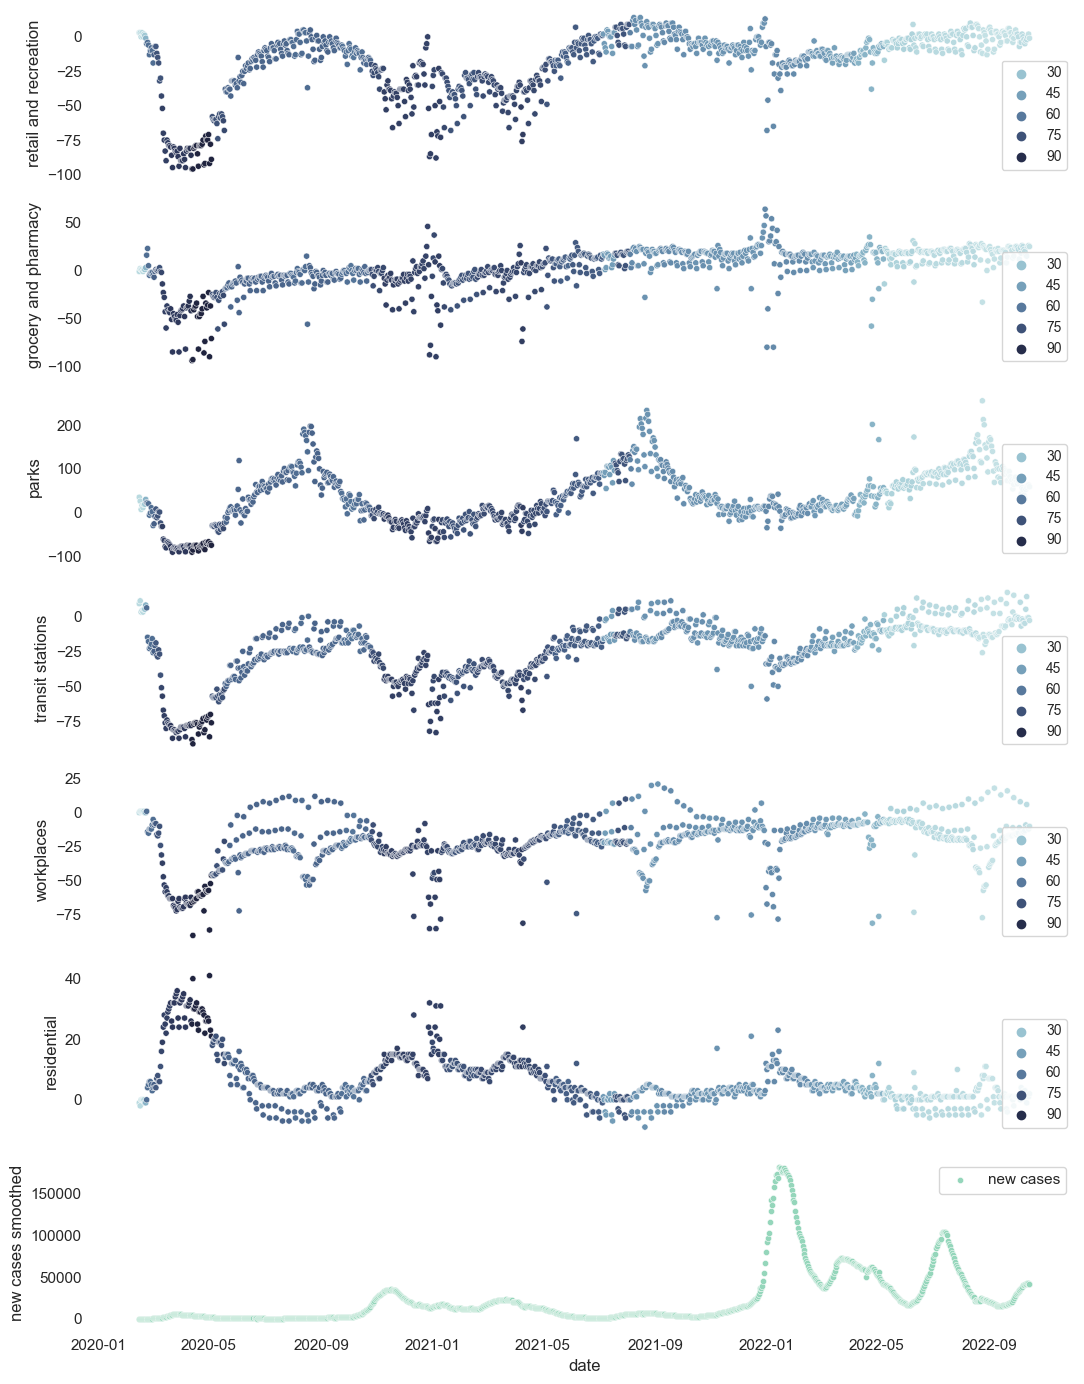

In [28]:
#filter df for one specific country, in this case Italy
country="Italy"
df_country=df_merged_pol_aux[df_merged_pol_aux["country_region"]==country]

sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"
fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "stringency_index", palette=cmap,ax=i)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=12)
        plt.xlabel("", fontsize=12)
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 10})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=12)   
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

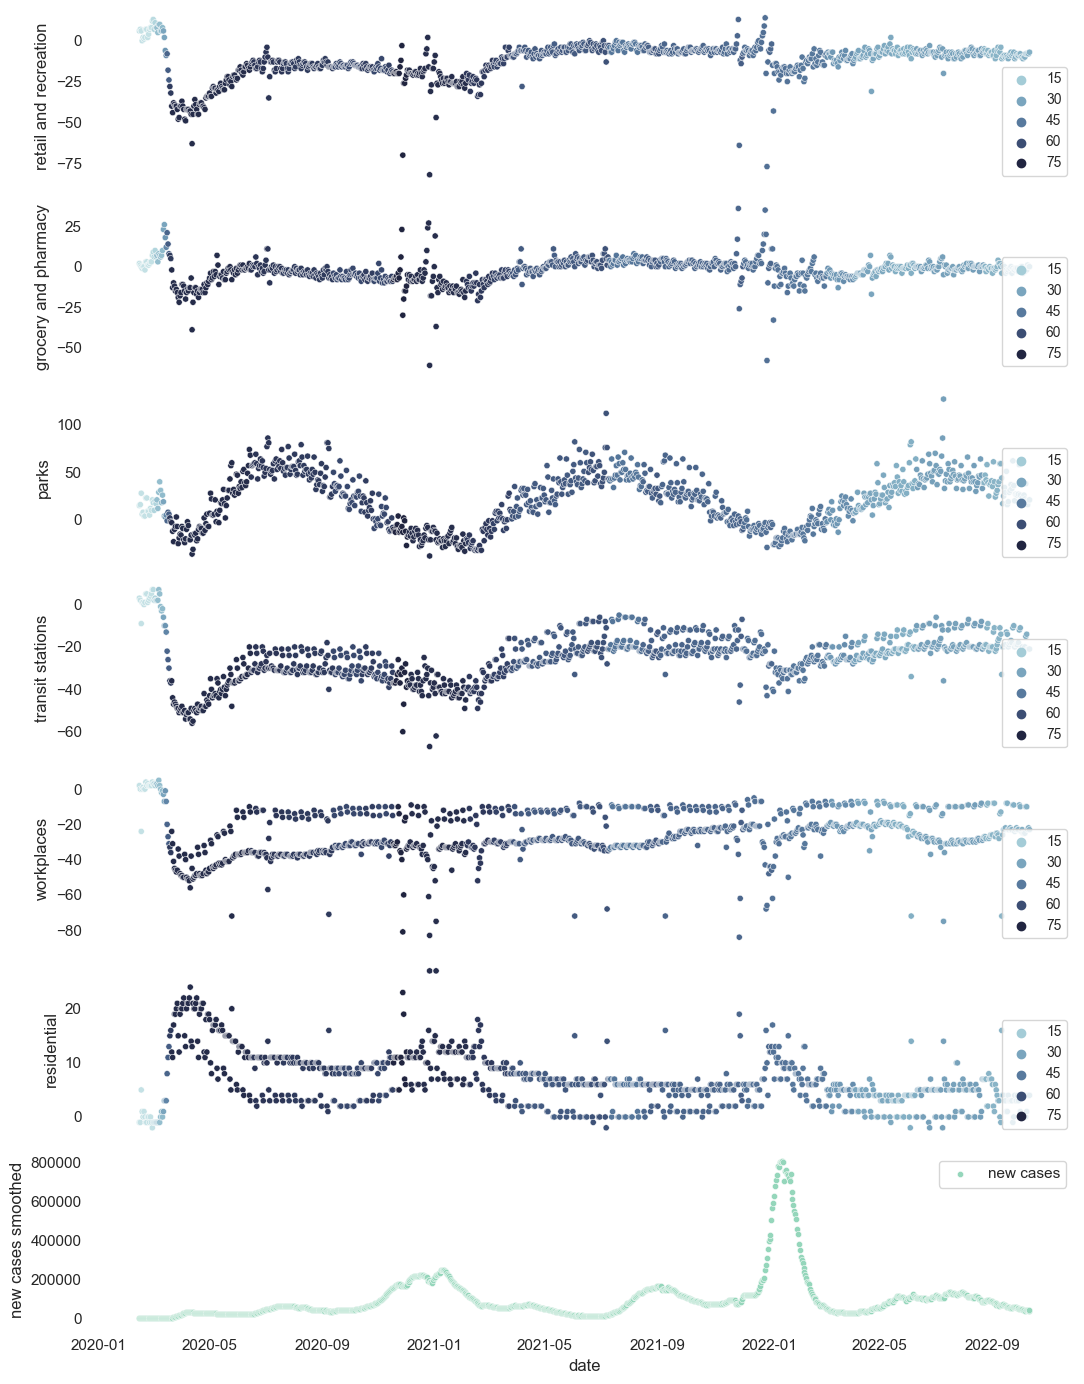

In [29]:
#filter df for one specific country, in this case United States
country="United States"
df_country=df_merged_pol_aux[df_merged_pol_aux["country_region"]==country]
sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"

fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "stringency_index", palette=cmap,ax=i)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=12)
        plt.xlabel("", fontsize=12)
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 10})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=12)        
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

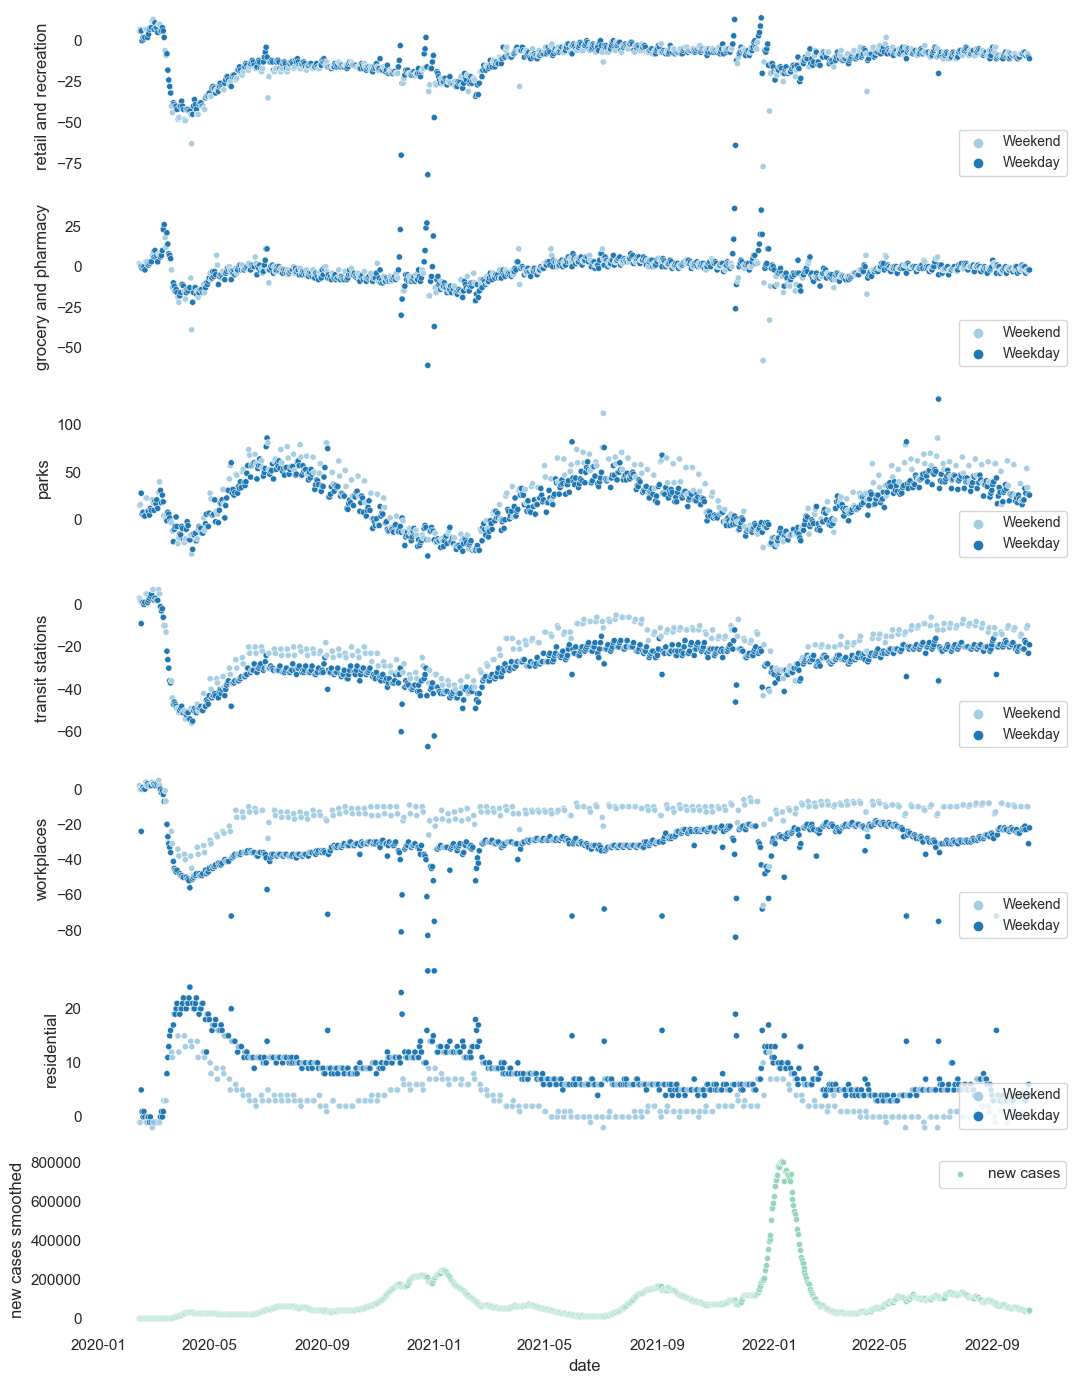

In [30]:
#we observe de difference between the weekdays from the weekend for the US case

country="United States"
df_country=df_merged_pol_aux[df_merged_pol_aux["country_region"]==country]
sns.set_palette("GnBu")
palette=sns.color_palette()
plt.figure(figsize=(15,8))
y_var="new_cases_smoothed"

fig, axes = plt.subplots(7,1, figsize=(11, 7*2))
for n, i in  enumerate(axes.flatten()):
    plt.subplot(7,1,n+1)
    if n < 6:
        sns.scatterplot(data=df_country,x="date",y=areas[n],s=20, hue = "is_weekend",palette="Paired")
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(areas[n].replace("_"," "), fontsize=12)
        plt.xlabel("", fontsize=12)
        plt.xticks([])
        plt.legend(loc="lower right",prop={'size': 10})
    else: 
        sns.scatterplot(data=df_country,x="date",y=y_var,color=palette[2],label="new cases", s=20)
        sns.despine(bottom = True, left = True, right=True, top=True)
        plt.ylabel(y_var.replace("_"," "),fontsize=12)        
plt.tight_layout()
plt.show()

In [38]:
df_country=df_merged_pol_aux[df_merged_pol_aux.country_region.isin(["Germany", "United States","Italy","New Zealand"])]

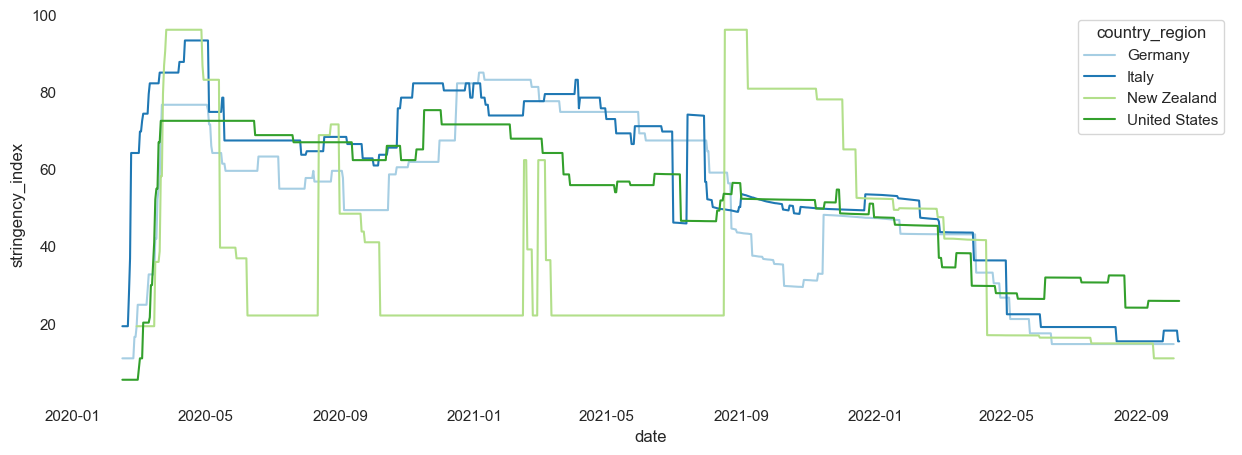

In [42]:
sns.set_theme(style="white")
sns.set_palette("Paired")
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_country,x="date",y="stringency_index", hue="country_region")
sns.despine(bottom = True, left = True, right=True, top=True)
plt.show()

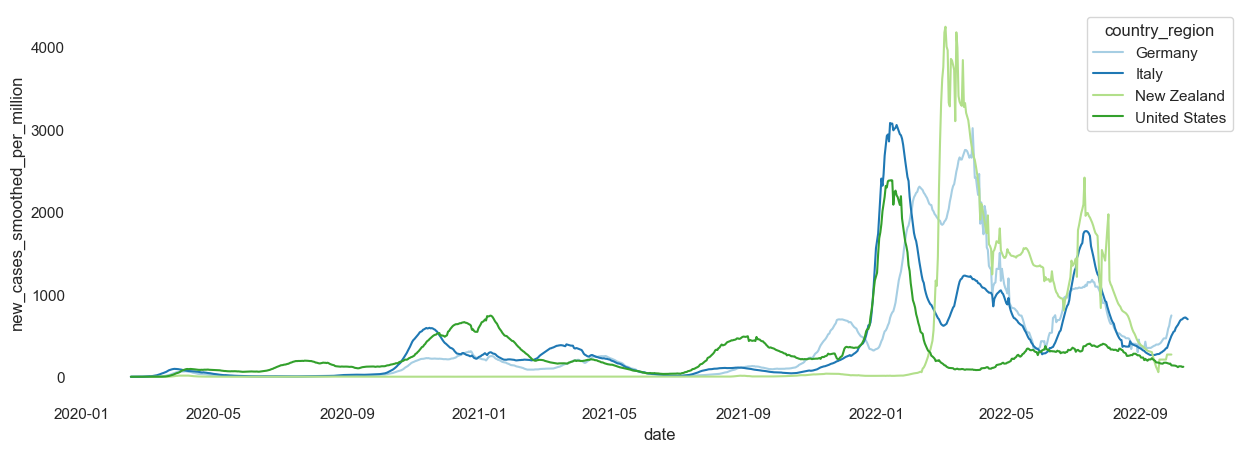

In [43]:
sns.set_theme(style="white")
sns.set_palette("Paired")
plt.subplots(figsize=(15,5))
sns.lineplot(data=df_country,x="date",y="new_cases_smoothed_per_million", hue="country_region")
sns.despine(bottom = True, left = True, right=True, top=True)
plt.show()